# Question 1: Use yfinance to Extract Stock Data

## Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [5]:
import yfinance as yf

In [9]:
import matplotlib.pyplot as plt

In [11]:
ticker_symbol = 'TSLA'

In [13]:
ticker_data = yf.Ticker(ticker_symbol)

In [15]:
ticker_df = ticker_data.history(period='1mo', interval='1d')

In [17]:
print(ticker_df.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-06-06 00:00:00-04:00  174.600006  179.729996  172.729996  177.940002   
2024-06-07 00:00:00-04:00  176.130005  179.350006  175.580002  177.479996   
2024-06-10 00:00:00-04:00  176.059998  178.570007  173.169998  173.789993   
2024-06-11 00:00:00-04:00  173.919998  174.750000  167.410004  170.660004   
2024-06-12 00:00:00-04:00  171.119995  180.550003  169.800003  177.289993   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-06-06 00:00:00-04:00  69887000        0.0           0.0  
2024-06-07 00:00:00-04:00  56244900        0.0           0.0  
2024-06-10 00:00:00-04:00  50869700        0.0           0.0  
2024-06-11 00:00:00-04:00  64761900        0.0           0.0  
2024-06-12 00:00:00-04:00  90389400        0.0           0.0  


# Question 2: Use Webscraping to Extract Tesla Revenue Data

## Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [25]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [27]:
response = requests.get(url)

In [29]:
soup = BeautifulSoup(response.content, "html.parser")

In [31]:
table = soup.find_all('table', {'class': 'historical_data_table table'})

In [35]:
data = []
for row in table[1].find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 2: 
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        data.append([date, revenue])

In [37]:
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

In [39]:
print(tesla_revenue.tail())

          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


# Question 3: Use yfinance to Extract Stock Data

## Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [42]:
import yfinance as yf
import pandas as pd

In [44]:
ticker_symbol_gme = 'GME'

In [46]:
ticker_data_gme = yf.Ticker(ticker_symbol_gme)

In [48]:
gme_data = ticker_data_gme.history(period='1mo', interval='1d')

In [50]:
gme_data.reset_index(inplace=True)

In [52]:
gme_data.to_csv('gme_data.csv', index=False)

In [54]:
print(gme_data.head())

                       Date       Open       High        Low      Close  \
0 2024-06-06 00:00:00-04:00  31.570000  47.500000  31.280001  46.549999   
1 2024-06-07 00:00:00-04:00  37.689999  48.000000  26.120001  28.219999   
2 2024-06-10 00:00:00-04:00  28.969999  29.340000  23.059999  24.830000   
3 2024-06-11 00:00:00-04:00  24.400000  30.920000  22.790001  30.490000   
4 2024-06-12 00:00:00-04:00  29.170000  33.700001  24.830000  25.459999   

      Volume  Dividends  Stock Splits  
0  206685800        0.0           0.0  
1  279054400        0.0           0.0  
2  131572400        0.0           0.0  
3  146914700        0.0           0.0  
4  147986700        0.0           0.0  


# Question 4: Use Webscraping to Extract GME Revenue Data

## Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [59]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [61]:
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [63]:
table = soup.find_all('table', {'class': 'historical_data_table table'})

In [65]:
data = []
for row in table[1].find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 2:  # Ensure it's a valid row with two columns (date and revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        data.append([date, revenue])

In [67]:
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

In [69]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


# Question 5: Plot Tesla Stock Graph

## Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

## Upload a screenshot of your results.

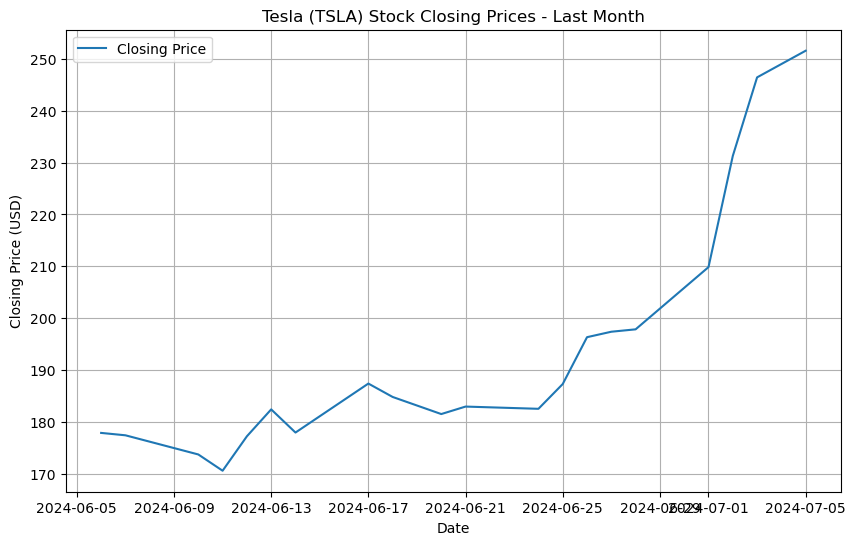

In [76]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, 'Tesla (TSLA) Stock Closing Prices - Last Month')

# Question 6: Plot GameStop Stock Graph

## Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

## Upload a screenshot of your results.

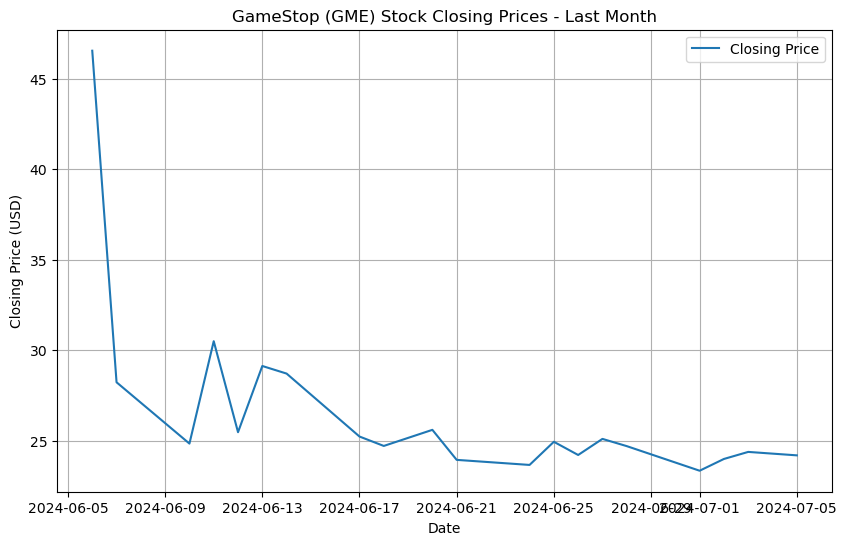

In [83]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(gme_data, 'GameStop (GME) Stock Closing Prices - Last Month')